### Проект - Дашборд и презентация для Яндекс.Дзен .

Импортируем библиотеки и подключаемся к базе.

In [23]:
import pandas as pd
from sqlalchemy import create_engine
!pip install psycopg2

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

Выполним sql-запрос и загрузим данные из таблицы dash_visits.  

In [24]:
query = ''' SELECT * 
            FROM dash_visits
        '''
dash_visits = pd.io.sql.read_sql(query, con = engine) 

Знакомимся с общей информацией о датафрейме.

In [25]:
dash_visits.info()
dash_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


Найдем общее количество визитов.

In [26]:
dash_visits['visits'].sum()

310207

Вроде бы, все выглядит неплохо.  

Найдем границы временного интервала измерений.

In [27]:
dash_visits['dt'].min()

Timestamp('2019-09-24 18:28:00')

In [28]:
dash_visits['dt'].max()

Timestamp('2019-09-24 19:00:00')

Псомотрим на распределение визитов по времени.

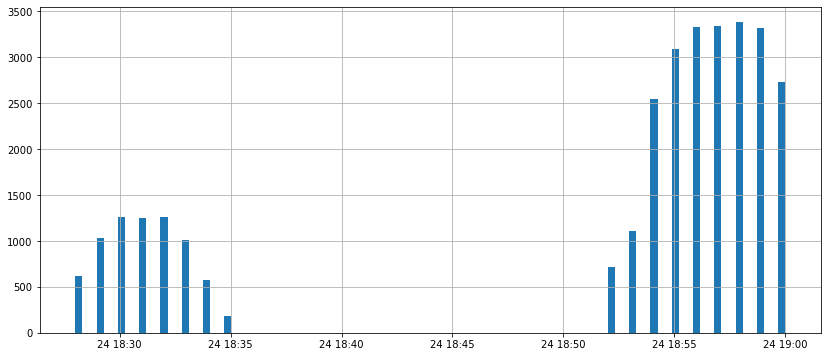

In [29]:
dash_visits['dt'].hist(bins=100, figsize=(14, 6))

Часть данных отсутствует в датасете: всего из 32-х минут нет данных для 17-ти минут. Непонятно, был ли это сбой при выгрузке данных или их действительно нет, тем не менее, будем использовать то, что имеем. По идее, этот недостаток не должен помешать  разработке дашборда, поэтому не будем лишний раз беспокоить коллег из ИТ-отдела, но надо будет сообщить им об этом.

Посмотрим на список карточек тем.

In [30]:
dash_visits['item_topic'].unique()

array(['Деньги', 'Дети', 'Женская психология', 'Женщины', 'Здоровье',
       'Знаменитости', 'Интересные факты', 'Искусство', 'История',
       'Красота', 'Культура', 'Наука', 'Общество', 'Отношения',
       'Подборки', 'Полезные советы', 'Психология', 'Путешествия',
       'Рассказы', 'Россия', 'Семья', 'Скандалы', 'Туризм', 'Шоу', 'Юмор'],
      dtype=object)

Проверим также корректность названий источников.

In [31]:
dash_visits['source_topic'].unique()

array(['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия',
       'Ремонт', 'Россия', 'Сад и дача', 'Сделай сам',
       'Семейные отношения', 'Семья', 'Спорт', 'Строительство',
       'Технологии', 'Финансы'], dtype=object)

Проверим датафрейм на дупликаты и пропуски.

In [32]:
dash_visits.duplicated().sum()

0

In [33]:
dash_visits.isnull().sum()

record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

Посмотрим также на всякий нет ли дупликатов в столбце *record_id*.

In [34]:
dash_visits['record_id'].nunique()

30745

Посмотрим на распределение визитов по темам источников.

In [35]:
dash_visits.groupby(['source_topic']).agg({'visits': 'sum', 'item_topic': 'count'}).sort_values(by='visits', ascending=False)#.head(15)

,visits,item_topic
source_topic,,
Семейные отношения,33309,1822
Россия,29831,1687
Полезные советы,27412,1578
Путешествия,24124,1563
Знаменитости,23945,1650
Кино,20084,1505
Дети,15243,1459
История,14628,1437
Семья,13896,1405


Оценим навскидку, как соотносятся темы карточек и темы источников.

In [36]:
pd.set_option('display.max_colwidth', 100)
dash_visits.groupby('source_topic')['item_topic'].unique()

source_topic
Авто                  [Деньги, Дети, Женская психология, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство,...
Деньги                [Деньги, Дети, Женская психология, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство,...
Дети                  [Деньги, Дети, Женская психология, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство,...
Еда                   [Деньги, Дети, Женская психология, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство,...
Здоровье              [Деньги, Дети, Женская психология, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство,...
Знаменитости          [Деньги, Дети, Женская психология, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство,...
Интерьеры             [Деньги, Дети, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство, История, Красота, К...
Искусство             [Деньги, Дети, Женская психология, Женщины, Здоровье, Знаменитости, Интересные факты, Искусство,...
История    

Находим большое количество пересечений тем из разных источников.

Построим теперь на распределение визитов по темам карточек.

In [37]:
dash_visits.groupby(['item_topic']).agg({'visits': 'sum'}).sort_values(by='visits', ascending=False)#.head(15)

,visits
item_topic,
Наука,21736
Отношения,20666
Интересные факты,19942
Общество,19640
Подборки,17772
Россия,16966
Полезные советы,15435
История,15389
Семья,11897


Выясним, как распределились визиты разным возрастным категориям...

In [38]:
dash_visits.groupby(['age_segment']).agg({'visits': 'sum'}).sort_values(by='visits', ascending=False).head(10)

,visits
age_segment,
18-25,131010
26-30,60311
31-35,53763
36-40,38166
41-45,16263
45+,10694


Ожидаемо наиболее активные пользователи относятся к самому молодому сегменту. 

Изучим общую картину интересов читателей Яндекс.Дзен.

In [39]:
#pd.set_option('display.max_rows', 500)
dash_visits.groupby(['age_segment', 'item_topic']).agg({'visits': 'sum'})

visits
age_segment item_topic                
18-25       Деньги                4472
            Дети                  5106
            Женская психология    3277
            Женщины               4619
            Здоровье              4573
...                                ...
45+         Семья                  424
            Скандалы               324
            Туризм                 330
            Шоу                    215
            Юмор                   333

[150 rows x 1 columns]

Выясним, как меняются интересы читателей разных возрастных групп. Выведем первую десятку интересов читателей.

In [40]:
dash_visits.groupby(['age_segment', 'item_topic']).agg({'visits': 'sum'}).sort_values(by='visits', ascending=False).head(10)

visits
age_segment item_topic              
18-25       Отношения           9631
            Наука               8897
            Общество            8550
            Интересные факты    8270
            Россия              7235
            Подборки            7071
            История             6522
            Полезные советы     6510
            Семья               5489
            Дети                5106

In [41]:
dash_visits.query('age_segment == "31-35"').groupby(['age_segment', 'item_topic']).agg({'visits': 'sum'}).sort_values(by='visits', ascending=False).head(10)

visits
age_segment item_topic              
31-35       Наука               3878
            Интересные факты    3509
            Общество            3349
            Подборки            3217
            Отношения           3189
            Россия              2963
            Полезные советы     2654
            История             2561
            Женщины             2112
            Рассказы            1931

In [42]:
dash_visits.query('age_segment == "45+"').groupby(['age_segment', 'item_topic']).agg({'visits': 'sum'}).sort_values(by='visits', ascending=False).head(10)

visits
age_segment item_topic              
45+         Наука                762
            Интересные факты     738
            Общество             695
            Отношения            674
            Подборки             604
            Россия               558
            История              524
            Полезные советы      513
            Семья                424
            Женщины              402

Интересно то, что первая десятка интересов аудиторий 18-25, 31-35 и 45+ осталась практически неизменной. Даже порядок  первых 8-ми тем не сильно меняется с возрастом, а заметные изменения касаются только семейных отношений в 9-ой и 10-ой строчках рейтинга. Зато активность групп может отличается на порядок, что, в общем-то, логично - опыт и знания приходят только с возрастом. А вот тотальная любознательность больше характерна для молодого поколения.

Посмотрим первую десятку источников для возрастной группы 18-25.

In [46]:
dash_visits.query('age_segment == "18-25"').groupby(['source_topic']).agg({'visits': 'sum', 'item_topic': 'count'}).sort_values(by='visits', ascending=False).head(10)

,visits,item_topic
source_topic,,
Россия,13534,364
Семейные отношения,13372,381
Полезные советы,12928,348
Путешествия,10319,337
Знаменитости,8841,354
Кино,7172,318
История,6292,340
Дети,6234,317
Здоровье,6121,297


In [47]:
dash_visits.groupby(['source_topic']).agg({'visits': 'sum', 'item_topic': 'count'}).sort_values(by='visits', ascending=False).head(10)

,visits,item_topic
source_topic,,
Семейные отношения,33309,1822
Россия,29831,1687
Полезные советы,27412,1578
Путешествия,24124,1563
Знаменитости,23945,1650
Кино,20084,1505
Дети,15243,1459
История,14628,1437
Семья,13896,1405


В целом картина совпадает с общей картиной и это, в общем, не удивительно, поскольку доля взаимодействий молодой части аудитории с карточками занимает почти половину от всего объема визитов - 42 процента.

Выгрузим данные в файл dash_visits.csv.

In [44]:
dash_visits.to_csv('dash_visits.csv')

Теперь мы можем приступить к созданию дашборда и его публикации.

Дашборд опубликован здесь:  https://public.tableau.com/profile/rafael5507#!/vizhome/Yandex_Zen_Project_Sprint_11/Yandex_Zen?publish=yes

Презентация выложена по адресу: https://disk.yandex.ru/i/4bpYfj99EkRqKA